In [1]:
%matplotlib inline
%config InlineBackend.figure_formats=['svg']

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lib import make_line

palette = ['#386DF9', '#FFDC52', '#FF1614', '#62F591', '#AA22FF', '#34495E']
sns.set(font_scale=1.1, style='darkgrid', palette=palette, context='notebook')

In [2]:
df = pd.read_csv('../data/classification_nonlinear.csv')
df.head()

,Age,Friends,Recommended
0,-0.080402,1.055525,0.0
1,-0.583689,0.903746,0.0
2,1.827524,-0.091287,1.0
3,-0.020863,0.518933,1.0
4,1.500793,-0.294553,1.0


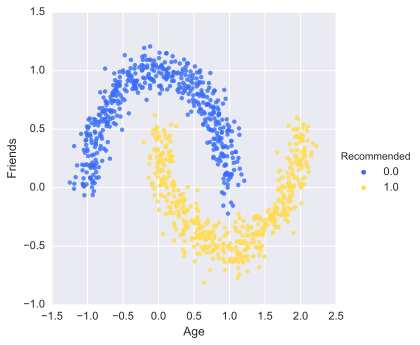

In [3]:
sns.lmplot('Age', 'Friends', data=df, fit_reg=False, hue='Recommended')

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

# (set random state for the purposes of demonstration)
train, test = train_test_split(df, train_size=0.7, random_state=1000)
X_train = train[['Age', 'Friends']]
y_train = train['Recommended']

X_test = test[['Age', 'Friends']]
y_test = test['Recommended']

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [5]:
m = model.coef_[0]
b = model.intercept_

print('m', m)
print('b', b)

m [ 1.10261287 -4.96031485]
b [ 0.63295482]


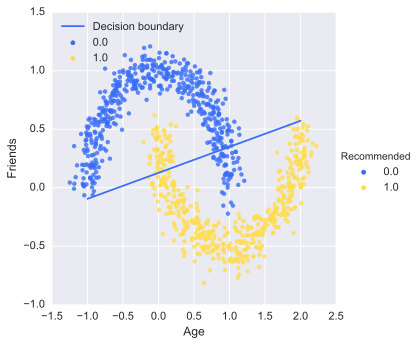

In [6]:
sns.lmplot('Age', 'Friends', data=df, fit_reg=False, hue='Recommended')

# Solve for y = m_1x_1 + m_2x_2 + b, where y=0, so we can plot this in 2D
def func(x):
    return -(m[0]*x + b)/m[1]

xs = np.linspace(-1, 2, 200)
ys = func(xs)
plt.plot(xs, ys, label='Decision boundary')
plt.legend(loc=2)

In [7]:
from sklearn import metrics
y_pred = model.predict(X_test)
metrics.roc_auc_score(y_pred, y_test)

0.90042788375824556

In [8]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

model = Sequential()
model.add(Dense(64, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='sgd')
model.fit(X_train.values, y_train.values, batch_size=16, nb_epoch=500, verbose=0)

Using Theano backend.


In [9]:
# keras gives us probabilities
y_prob = model.predict(X_test.values)

# convert to labels
y_pred = np.rint(y_prob)
metrics.roc_auc_score(y_test, y_pred)

0.9832325209037539

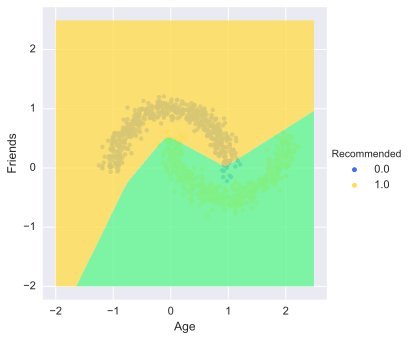

In [11]:
sns.lmplot('Age', 'Friends', data=df, fit_reg=False, hue='Recommended')

# some ugly stuff to see where the decision boundary is
rng = np.arange(-2, 2.5, 0.01)
xs, ys = np.meshgrid(rng, rng)
Z = np.rint(model.predict(np.vstack([xs.ravel(), ys.ravel()]).T))
Z = Z.reshape(xs.shape)
plt.contourf(xs, ys, Z, levels=[0, 1], colors=(palette[1],palette[3],palette[1]), cmap=None, extend='both', alpha=0.8)